# 1. Data Loading and Preprocessing

Loading the data and selecting the numeric features for PCA.

In [82]:
# Imports 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [84]:
# Configure global plot settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

In [86]:
# Load the data
df = pd.read_csv('student_habits_performance.csv')

In [88]:
# Numeric features for PCA
numeric_cols = [
    'age',
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'sleep_hours',
    'exercise_frequency',
    'mental_health_rating',
    'exam_score'
]
data_numeric = df[numeric_cols].dropna()

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# 2. Covariance Matrix and Heatmap

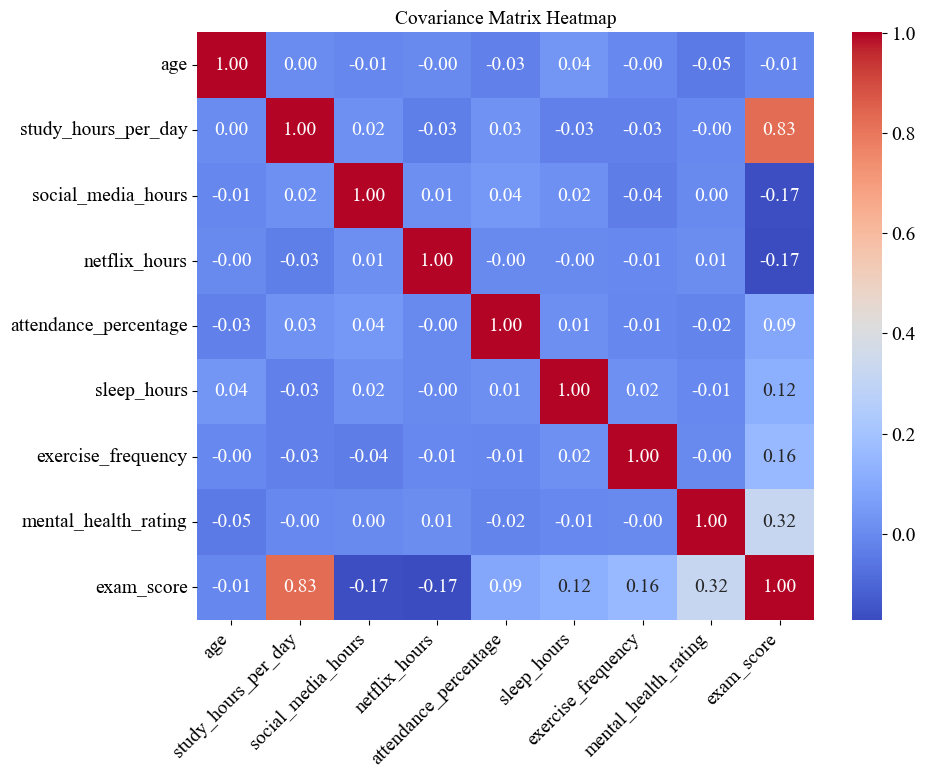

In [91]:
# Compute covariance matrix
cov_matrix = np.cov(data_scaled, rowvar=False)

# Plot covariance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cov_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    xticklabels=numeric_cols,
    yticklabels=numeric_cols
)
plt.title('Covariance Matrix Heatmap', fontname='Times New Roman', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# Save figure
plt.savefig('<Isaac>+CovarianceHeatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Observations
- All nine numeric features are standardized to mean = 0 and standard deviation = 1
- No missing values remained after selecting and dropping NaNs
- The heatmap reveals which features vary together post standardization
- It shows that more study times tend to correspond to higher exam scores

# 3. Eigenvalues and Eigenvectors Visualization

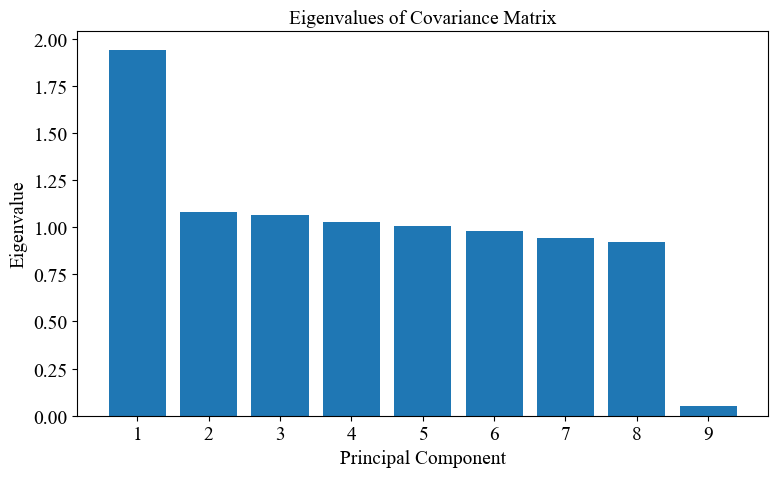

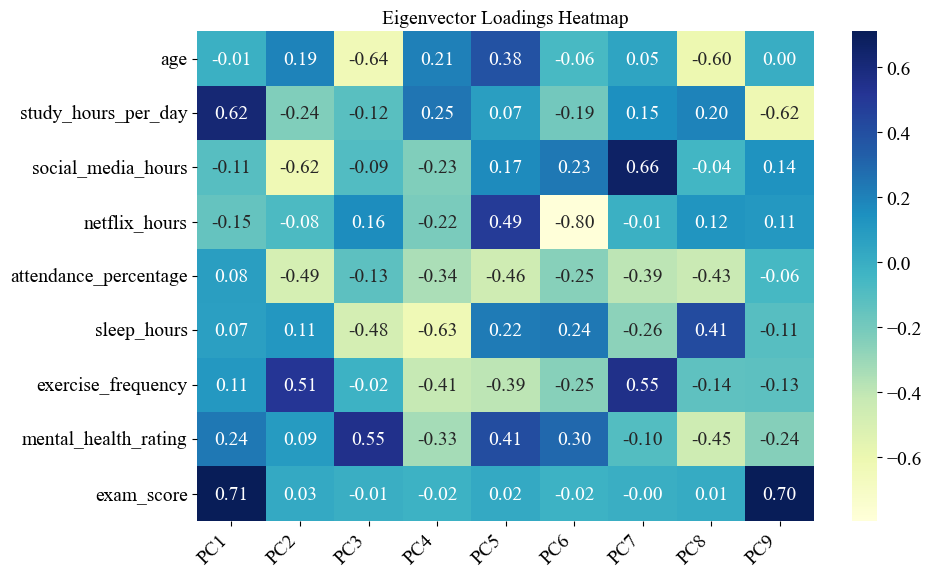

In [95]:
# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Bar chart of eigenvalues
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Principal Component', fontname='Times New Roman', fontsize=14)
plt.ylabel('Eigenvalue', fontname='Times New Roman', fontsize=14)
plt.title('Eigenvalues of Covariance Matrix', fontname='Times New Roman', fontsize=14)
plt.xticks(range(1, len(eigenvalues) + 1))
plt.tight_layout()
plt.savefig('<Isaac>EigenvaluesBarChart.png', dpi=300, bbox_inches='tight')
plt.show()

# Heatmap of eigenvectors
plt.figure(figsize=(10, 6))
sns.heatmap(
    eigenvectors,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    xticklabels=[f'PC{i}' for i in range(1, len(eigenvalues)+1)],
    yticklabels=numeric_cols
)
plt.title('Eigenvector Loadings Heatmap', fontname='Times New Roman', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('<Isaac>+EigenvectorsHeatmap.png', dpi=300, bbox_inches='tight')
plt.show()


- The bar chart indicates how much variance each principal component captures.
- The heatmap of loadings shows how original features contribute to each principal component

# 4. Additional PCA-Based Visualizations

## Scree Plot

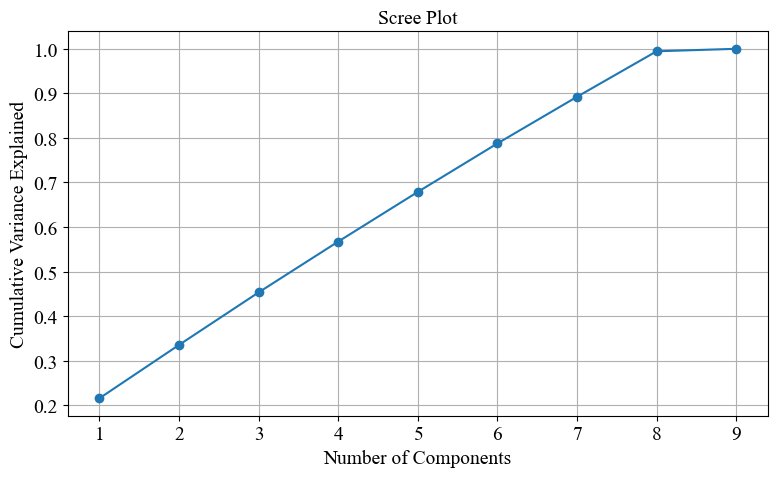

In [100]:
# Perform PCA using sklearn to get explained variance
pca = PCA()
pca.fit(data_scaled)
var_ratio = pca.explained_variance_ratio_
cum_var = np.cumsum(var_ratio)

# Scree plot: cumulative variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel('Number of Components', fontname='Times New Roman', fontsize=14)
plt.ylabel('Cumulative Variance Explained', fontname='Times New Roman', fontsize=14)
plt.title('Scree Plot', fontname='Times New Roman', fontsize=14)
plt.xticks(range(1, len(cum_var) + 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('<Isaac>+ScreePlot.png', dpi=300, bbox_inches='tight')
plt.show()

## 2D Scatterplot

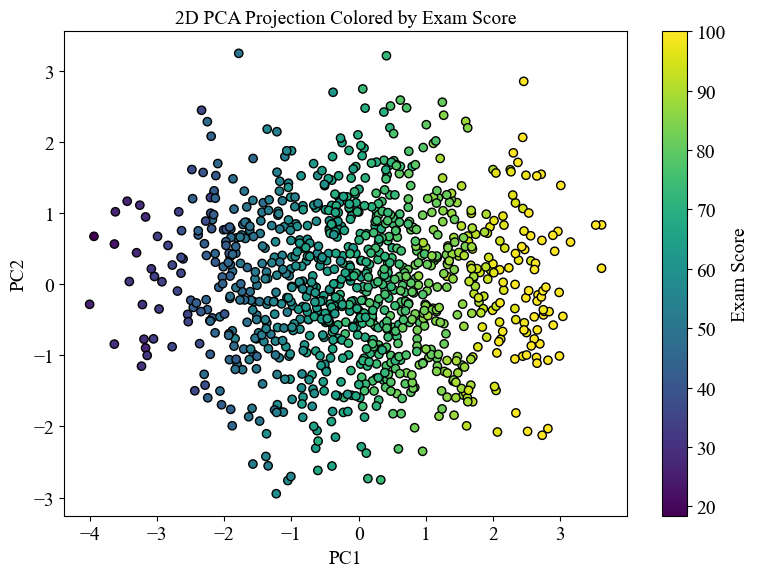

In [103]:
# Project data onto first two PCs
proj_2d = pca.transform(data_scaled)[:, :2]

# 2D scatterplot colored by exam_score
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    proj_2d[:, 0],
    proj_2d[:, 1],
    c=data_numeric['exam_score'],
    cmap='viridis',
    edgecolor='k'
)
plt.xlabel('PC1', fontname='Times New Roman', fontsize=14)
plt.ylabel('PC2', fontname='Times New Roman', fontsize=14)
plt.title('2D PCA Projection Colored by Exam Score', fontname='Times New Roman', fontsize=14)
plt.colorbar(sc, label='Exam Score')
plt.tight_layout()

plt.savefig('<Isaac>+2DScatter.png', dpi=300, bbox_inches='tight')
plt.show()

## PCA Biplot

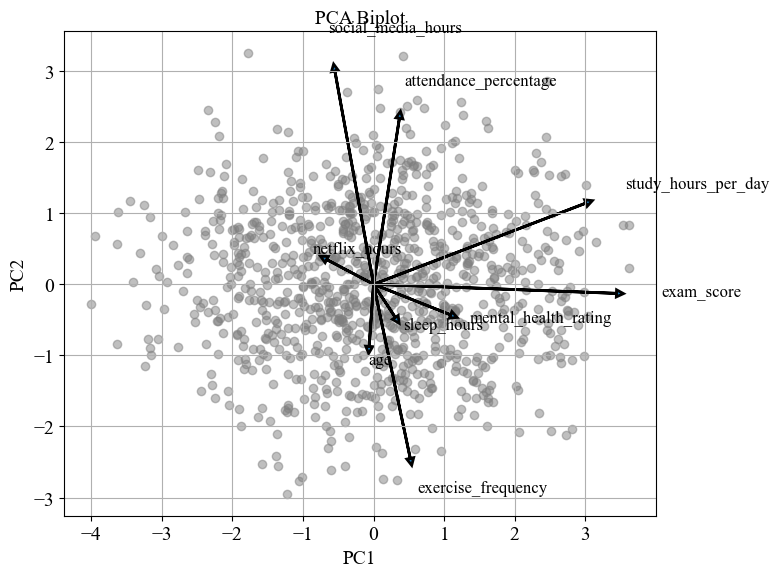

In [106]:
# Biplot: 2D projection with feature vectors
plt.figure(figsize=(8, 6))
xs = proj_2d[:, 0]
ys = proj_2d[:, 1]
plt.scatter(xs, ys, alpha=0.5, c='gray')

# Draw vectors
feature_vectors = pca.components_.T[:, :2]
origin = np.zeros(2)
for i, v in enumerate(feature_vectors):
    plt.arrow(
        origin[0], origin[1],
        v[0]*5, v[1]*5,
        head_width=0.1,
        head_length=0.1,
        linewidth=2,
        length_includes_head=True
    )
    plt.text(
        v[0]*5*1.15, v[1]*5*1.15,
        numeric_cols[i],
        fontname='Times New Roman',
        fontsize=12
    )

plt.xlabel('PC1', fontname='Times New Roman', fontsize=14)
plt.ylabel('PC2', fontname='Times New Roman', fontsize=14)
plt.title('PCA Biplot', fontname='Times New Roman', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig('<Isaac>+Biplot.png', dpi=300, bbox_inches='tight')
plt.show()